
## In this exercise, we will use the patient data and understand the following:

> 1. Importing the datset from a csv file
2. Understanding the strucutre and summary of the data
3. Typecasting a variable to a proper data type
4. Creating derived variables and interaction variables
5. Analyzing the corelation amongst variables
6. Releveling the factor variable and understand its impact
7. Building the regression model using caret package
8. Writing the model equation and interpreting the model summary
9. Analayzing the statistics to acertain the validity of the model

There are bugs/missing code in the entire exercise. The participants are expected to work upon them.
***
***

## Here are some useful links:

> 1. Refer [link](http://www.ats.ucla.edu/stat/r/library/contrast_coding.htm) to know more about different ways of dummy variable coding
2. [Read](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/dummy.htm) about interaction variable coding
3. Refer [link](http://www.statmethods.net/input/valuelabels.html) to know about adding lables to factors
4. Refer [link](http://stackoverflow.com/questions/2342472/recode-relevel-data-frame-factors-with-different-levels) to relevel factor variables
5. [Read](http://stats.stackexchange.com/questions/88485/variable-is-significant-through-stepwise-regression-but-not-in-final-models-sum) about the issues in stepwise regression
6. The issues arising out of multi-colinearity is discussed  [here](http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis) or  [here](https://onlinecourses.science.psu.edu/stat501/node/343)
7. The residual diagonstic can be interpreted from [here](http://data.library.virginia.edu/diagnostic-plots/)
8. [Read](https://onlinecourses.science.psu.edu/stat501/node/337) to understand the distinction between **outliers** and **influential cases**
9. [Change](http://stackoverflow.com/questions/16819956/invalid-factor-level-na-generated) NAs to a new label
10. Issues with rJava installation may get resolved by following [link](https://www.r-statistics.com/2012/08/how-to-load-the-rjava-package-after-the-error-java_home-cannot-be-determined-from-the-registry/) or by [link](http://stackoverflow.com/questions/27661325/unable-to-load-rjava-on-r)

***

# Code starts here

We are going to use below mentioned libraries for demonstrating regression:



We are going to use **stats** and **caret** packages for demonstrating linear regression. However by default, the R packages which will be referred is in the root environment.

In [1]:
.libPaths()

[1] "/Users/Rahul/anaconda3/lib/R/library"

We created a seperate virtual environment named "R" using the navigator for specific use on this project. We will be want to use the virtual environment named **R** for doing all the analysis. In order to do so:

> - Activate the environment using anaconda navigator
- Set the session to refer to the library location of the current environment by using below code chuck. 

Note, You may need to modify the path to refer to correct location in your machine.

In [2]:
assign(".lib.loc", "/Users/Rahul/anaconda3/envs/R/lib/R/library", envir = 
       environment(.libPaths))
.libPaths()

[1] "/Users/Rahul/anaconda3/envs/R/lib/R/library"

In [5]:
library(stats)    #for regression
library(caret)    #for data partition
library(car)      #for VIF
library(sandwich) #for variance, covariance matrix



## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_


In [7]:
raw_df <- read.csv("/Users/Rahul/Documents/Datasets/Mission Hospital-Case Data.csv", header = TRUE,sep = ",",na.strings = c(""," ", "NA"))
raw_df <- raw_df[,-c(58:62)]
raw_df

SL.,AGE,GENDER,MALE,Age.Gender,MARITAL.STATUS,UNMARRIED,KEY.COMPLAINTS..CODE,ACHD,CAD.DVD,⋯,Ln.Total.Cost.,TOTAL.AMOUNT.BILLED.TO.THE.PATIENT,CONCESSION,ACTUAL.RECEIVABLE.AMOUNT,TOTAL.LENGTH.OF.STAY,LENGTH.OF.STAY...ICU,LENGTH.OF.STAY..WARD,IMPLANT.USED..Y.N.,IMPLANT,COST.OF.IMPLANT
1,58,M,0,0,MARRIED,0,other- heart,0,0,⋯,13.40044,474901,0,474901,25,12,13,Y,1,38000
2,59,M,0,0,MARRIED,0,CAD-DVD,0,1,⋯,13.60371,944819,96422,848397,41,20,21,Y,1,39690
3,82,M,0,0,MARRIED,0,CAD-TVD,0,0,⋯,12.80004,390000,30000,360000,18,9,9,N,0,0
4,46,M,0,0,MARRIED,0,CAD-DVD,0,1,⋯,13.35346,324910,0,324910,14,13,1,Y,1,89450
5,60,M,0,0,MARRIED,0,CAD-DVD,0,1,⋯,13.00555,254673,10000,244673,24,12,12,N,0,0
6,75,M,0,0,MARRIED,0,CAD-DVD,0,1,⋯,12.82761,499987,0,499987,31,9,22,N,0,0
7,73,M,0,0,MARRIED,0,CAD-TVD,0,0,⋯,13.69599,660504,504,660000,15,15,0,N,0,0
8,71,M,0,0,MARRIED,0,CAD-TVD,0,0,⋯,12.87346,248580,0,248580,24,11,13,N,0,0
9,72,M,0,0,MARRIED,0,CAD-DVD,0,1,⋯,12.98890,691297,0,691297,26,9,17,N,0,0
10,61,M,0,0,MARRIED,0,CAD-TVD,0,0,⋯,12.80552,247654,0,247654,20,4,16,N,0,0



Note that `echo = FALSE` parameter prevents printing the R code that generated the
plot.

### 2a. Structure and Summary of the dataset
There are 175 NA values in Past Medical History Code. However, rather than treating these as missing values, it represents that there is no past medical history for these patients. These NA may be marked as "None". But while doing so, the code will give an error as we are trying to add a new level to factor variable (**raw_df$Past.MEDICAL.HISTORY.CODE**). In order to add a new level, first we will need to typecast this variable as a character variable, add a new level and then re-typecast them as Factor variable.



In [8]:
str(raw_df)
summary(raw_df)

raw_df$PAST.MEDICAL.HISTORY.CODE[raw_df$PAST.MEDICAL.HISTORY.CODE == "Hypertension1"] <- "hypertension1"

raw_df$PAST.MEDICAL.HISTORY.CODE <- as.character(raw_df$PAST.MEDICAL.HISTORY.CODE)

raw_df$PAST.MEDICAL.HISTORY.CODE[is.na(raw_df$PAST.MEDICAL.HISTORY.CODE)] <- "None"

raw_df$PAST.MEDICAL.HISTORY.CODE <- as.factor(raw_df$PAST.MEDICAL.HISTORY.CODE)

'data.frame':	250 obs. of  57 variables:
 $ SL.                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ AGE                               : num  58 59 82 46 60 75 73 71 72 61 ...
 $ GENDER                            : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ MALE                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Age.Gender                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ MARITAL.STATUS                    : Factor w/ 2 levels "MARRIED","UNMARRIED": 1 1 1 1 1 1 1 1 1 1 ...
 $ UNMARRIED                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ KEY.COMPLAINTS..CODE              : Factor w/ 13 levels "ACHD","CAD-DVD",..: 7 2 4 2 2 2 4 4 2 4 ...
 $ ACHD                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CAD.DVD                           : int  0 1 0 1 1 1 0 0 1 0 ...
 $ CAD.SVD                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CAD.TVD                           : int  0 0 1 0 0 0 1 1 0 1 ...
 $ CAD.VSD                          

      SL.              AGE         GENDER         MALE          Age.Gender    
 Min.   :  1.00   Min.   : 0.03   F   : 82   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 62.75   1st Qu.: 6.00   M   :166   1st Qu.:0.0000   1st Qu.: 0.000  
 Median :124.50   Median :15.50   NA's:  2   Median :0.0000   Median : 0.000  
 Mean   :124.50   Mean   :28.88              Mean   :0.3306   Mean   : 7.206  
 3rd Qu.:186.25   3rd Qu.:55.00              3rd Qu.:1.0000   3rd Qu.: 4.250  
 Max.   :248.00   Max.   :88.00              Max.   :1.0000   Max.   :78.000  
 NA's   :2        NA's   :2                  NA's   :2        NA's   :2       
   MARITAL.STATUS   UNMARRIED         KEY.COMPLAINTS..CODE      ACHD        
 MARRIED  :108    Min.   :-0.8985   other- heart:55        Min.   :0.00000  
 UNMARRIED:140    1st Qu.: 0.0000   CAD-DVD     :27        1st Qu.:0.00000  
 NA's     :  2    Median : 1.0000   RHD         :26        Median :0.00000  
                  Mean   : 0.5586   CAD-TVD     :24        M


Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed.



In [9]:
new_df <- raw_df[,c(-1,-4,-5,-7,-9:-21,-23,-25,-31:-36,-41,-42,-44,-46,-48,-56)]
new_df <- na.omit(new_df) # listwise deletion of missing


### 3a. Correlation among Variables

From the numeric attribute in the data, it will of interest to analyze the variables which are corelated to each other. High corelation amongst variable may result in the issue of **multi-colinearity** in the model.



In [10]:
correlationMatrix <- cor(new_df[,c(1,7:10,12:14,18:24,26)])
print(correlationMatrix)
# find attributes that are highly corrected (ideally >0.7)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff = 0.7, names = TRUE)
print(highlyCorrelated)

                                           AGE     HR.PULSE    BP..HIGH
AGE                                 1.00000000 -0.451244005  0.58656780
HR.PULSE                           -0.45124400  1.000000000 -0.29163412
BP..HIGH                            0.58656780 -0.291634124  1.00000000
BP.LOW                              0.46545550 -0.207449219  0.77298853
RR                                 -0.23480792  0.373233721 -0.08309698
HB                                 -0.21849870  0.099654811 -0.08392965
UREA                                0.28568989 -0.024115762  0.09639492
CREATININE                          0.70849144 -0.334538256  0.44300126
TOTAL.COST.TO.HOSPITAL              0.49918592 -0.060194555  0.21756095
TOTAL.AMOUNT.BILLED.TO.THE.PATIENT  0.49932971 -0.057115599  0.22629958
CONCESSION                         -0.38706554  0.199744235 -0.29482834
ACTUAL.RECEIVABLE.AMOUNT            0.54955029 -0.103888398  0.28100749
TOTAL.LENGTH.OF.STAY                0.34517109  0.009432666  0.1

[1] "AGE"                      "ACTUAL.RECEIVABLE.AMOUNT"
[3] "TOTAL.COST.TO.HOSPITAL"   "LENGTH.OF.STAY...ICU"    
[5] "TOTAL.LENGTH.OF.STAY"     "BP..HIGH"                



### 3b. Derived variables
Deriving BMI to drop of Weight and Height as variables. Both of them where highly corelated to age. Droping Cretanine as a variable as it is highly corleated to age.



In [11]:
new_df$BMI <- new_df$BODY.WEIGHT/((new_df$BODY.HEIGHT/100) ^ 2)
new_df$I_COST.OF.IMPLANT <- model.matrix(~new_df$IMPLANT.USED..Y.N.)[,2]*new_df$COST.OF.IMPLANT
filter_df <- new_df[,c(-5:-6)]


### 3c. Relevel

By default, the base category/reference category selected is ordered alphabetically. In this code chunk we are just changing the base category for PAST.MEDICAL.HISTORY.CODE variable.

The base category can be releveled using the function **relevel()**.



In [12]:
filter_df$PAST.MEDICAL.HISTORY.CODE <- relevel(filter_df$PAST.MEDICAL.HISTORY.CODE, ref = "None")



### 4. Create train and test datase vct

#### Reserve 80% for **_training_** and 20% of **_test_**

_Correct the error in the below code chunk_


In [13]:
set.seed(2341)
trainIndex <- createDataPartition(filter_df$TOTAL.COST.TO.HOSPITAL, p = 0.80, list = FALSE)
train_df <- filter_df[trainIndex,]
test_df <- filter_df[-trainIndex,]


Transformation of variables may be needed to validate the model assumptions.


In [14]:
train_df$Log.Cost.Treatment <- log(train_df$TOTAL.COST.TO.HOSPITAL)
test_df$Log.Cost.Treatment <- log(test_df$TOTAL.COST.TO.HOSPITAL)


We can pull the specific attribute needed to build the model in another data frame. This agian is more of a hygine practice to not touch the **train** and **test** data set directly.

_Correct the error in the below code chunk_


In [15]:
reg_train_df <- as.data.frame(train_df[,c("AGE",
                                             "HR.PULSE",
                                             "BP..HIGH",
                                             "RR",
                                             "HB",
                                             "UREA",
                                             #"TOTAL.LENGTH.OF.STAY",
                                             "BMI",
                                             #"COST.OF.IMPLANT",
                                             #"IMPLANT.USED..Y.N.",
                                             "I_COST.OF.IMPLANT",
                                             "GENDER",
                                             "MARITAL.STATUS",
                                             "KEY.COMPLAINTS..CODE",
                                             "PAST.MEDICAL.HISTORY.CODE",
                                             "MODE.OF.ARRIVAL",
                                             #"STATE.AT.THE.TIME.OF.ARRIVAL",
                                             "TYPE.OF.ADMSN",
                                             "TOTAL.COST.TO.HOSPITAL"
                                             #"Log.Cost.Treatment"
)])


_Correct the error in the below code chunk_


In [16]:
reg_test_df <- as.data.frame(test_df[,c("AGE",
                                             "HR.PULSE",
                                             "BP..HIGH",
                                             "RR",
                                             "HB",
                                             "UREA",
                                             #"TOTAL.LENGTH.OF.STAY",
                                             "BMI",
                                             "COST.OF.IMPLANT",
                                             "IMPLANT.USED..Y.N.",
                                             "I_COST.OF.IMPLANT",
                                             "GENDER",
                                             "MARITAL.STATUS",
                                             "KEY.COMPLAINTS..CODE",
                                             "PAST.MEDICAL.HISTORY.CODE",
                                             "MODE.OF.ARRIVAL",
                                             #"STATE.AT.THE.TIME.OF.ARRIVAL",
                                             "TYPE.OF.ADMSN",
                                             "TOTAL.COST.TO.HOSPITAL"
                                             #"Log.Cost.Treatment"
)])


***

## Model building: Using the **lm()** function

The actual model building starts now. Note that we are demonstrating the strategy of building a step wise model (forward selection and backward elimination)  using the **lm()** function



In [18]:
#Null Model
no_model <- lm(TOTAL.COST.TO.HOSPITAL ~ 1,data = reg_train_df)

#Full Model
reg_full_model = lm(TOTAL.COST.TO.HOSPITAL ~ ., data = reg_train_df)

#Stepwise - Forward selection backward elimination
reg_step_model <- step(no_model, list(lower = formula(no_model),
                                         upper = formula(reg_full_model)),
                           direction = "both",trace = 0)



***

## Model Evaluation

### 1. Model summary of Train Data

Checking the if the model satisfies the assumpations of Linear Regression Model. Note that this evaluation is on training data.

The model summary gives the equation of the model as well as helps test the assumption that beta coeffiecents are not statically zero.


In [19]:
summary(reg_step_model)


Call:
lm(formula = TOTAL.COST.TO.HOSPITAL ~ TYPE.OF.ADMSN + I_COST.OF.IMPLANT + 
    AGE + HR.PULSE, data = reg_train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-173132  -54897   -4510   35478  374285 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.219e+04  4.709e+04   0.896   0.3720    
TYPE.OF.ADMSNEMERGENCY 1.326e+05  2.551e+04   5.195 7.99e-07 ***
I_COST.OF.IMPLANT      2.222e+00  3.835e-01   5.794 5.18e-08 ***
AGE                    1.852e+03  3.830e+02   4.836 3.78e-06 ***
HR.PULSE               8.028e+02  4.413e+02   1.819   0.0713 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 85690 on 126 degrees of freedom
Multiple R-squared:  0.5635,	Adjusted R-squared:  0.5497 
F-statistic: 40.67 on 4 and 126 DF,  p-value: < 2.2e-16




You may ignore the below code chunk. This code is more to understand how the standard error of beta coefficients are calculated. **vcov()** is used to compute the variance covariance matrix of the fitted object. **cov2cor()** is used to scale the covariance matrix into the correponding correlation matrix. In the matrix generated out of the below code chunk:

> 1. The diagonal values are the variance of the variable to itself.
2. The square root of the diagonal values gives the standard error associated with the estimates.
3. The non diagonal elements are the covariance of the estimated



In [20]:
vcov(reg_step_model)
sqrt(diag(vcov(reg_step_model)))
#cov2cor(vcov(RegModelStepwise))

,(Intercept),TYPE.OF.ADMSNEMERGENCY,I_COST.OF.IMPLANT,AGE,HR.PULSE
(Intercept),2.217524e+09,2.992403e+08,-698.0150674,-1.158026e+07,-2.011840e+07
TYPE.OF.ADMSNEMERGENCY,2.992403e+08,6.509817e+08,6.7369385,-5.031169e+06,-2.538171e+06
I_COST.OF.IMPLANT,-6.980151e+02,6.736939e+00,0.1470902,-2.184030e+01,6.417772e-01
AGE,-1.158026e+07,-5.031169e+06,-21.8403041,1.466900e+05,8.643503e+04
HR.PULSE,-2.011840e+07,-2.538171e+06,0.6417772,8.643503e+04,1.947850e+05


(Intercept) TYPE.OF.ADMSNEMERGENCY      I_COST.OF.IMPLANT 
          4.709060e+04           2.551434e+04           3.835234e-01 
                   AGE               HR.PULSE 
          3.830013e+02           4.413445e+02


### 2. The residual analysis

The error term diagnostic is critical to understanding the behaviour of linear regression models. The two critical assumptions of linear regression are:

>1. Error term should be normally distributed
2. Error term should have constant variance (**homoscedasticity**)

The **plot()** function when used on the regression object model gives us four different plots. The two important one to analyze there are:

1. Normal Q-Q
2. Scale-Location

#####1. Normal Q_Q plot
This plot shows if the error terms are normally distributed. In case, of normal distribution, the dots should appear close to the straight line with not much of a deviation.

#####2. Scale-Location
Also known as spread location plot, it shows if the residuals are equally spread along the range of predictors. It is desirable to see a horizontal straight line with with randomly spread points.

**The other two plots are:**

#####3. Residual vs. Fitted
There could be a non linear relationship between predictor variable (Xs) and the outcome variable (Y). This non linear relationship can show up in this plot which may suggest that the model is mis-specified. It is desirable to see a horizontal straight line with with randomly spread points.

#####4. Residual vs. Leverage
The regression line can be influenced by outliers (extreme values in Y) or by data points with high leverage (extreme values in X). Not all the extreme values are influential cases in regression analysis.

Even if data has extreme values, it may not be influential to determine the regression line. On the flip side, some cases could be very influential even if they do not seem to be an outlier. Influential cases are identified by cook's distance. In the plot, look for for outlying values at the upper right corner or at the lower right corner (cases outside of a dashed line i.e. Cook’s distance).



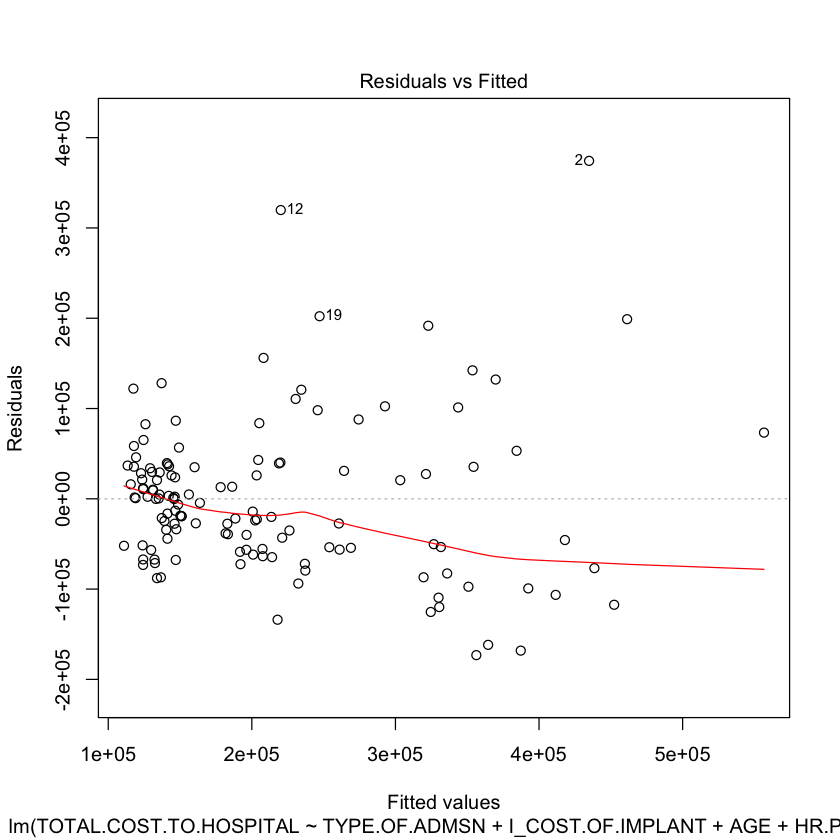

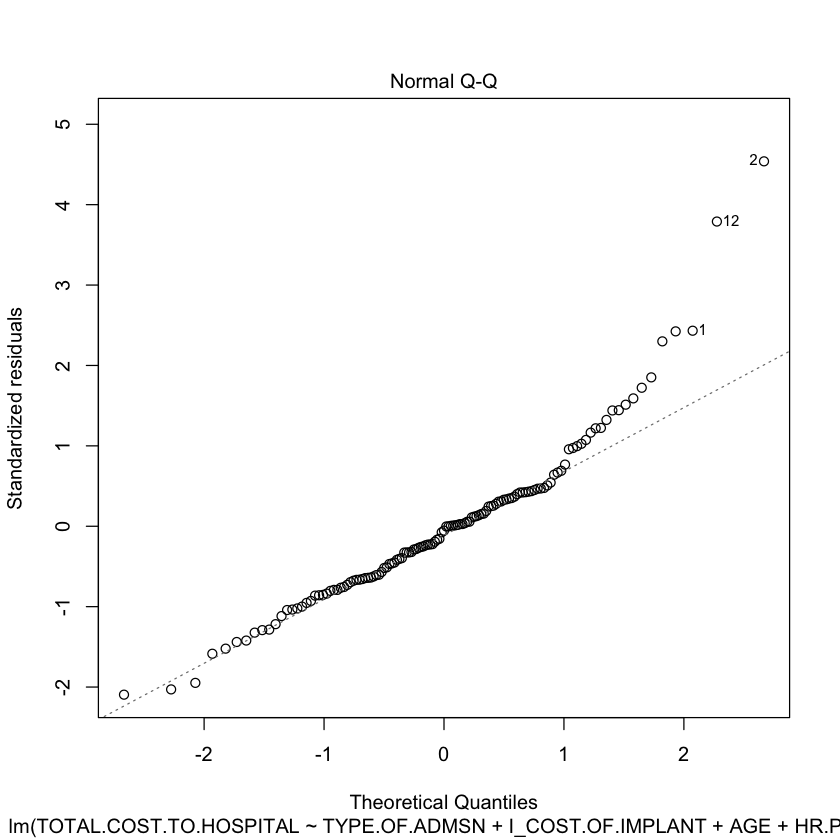

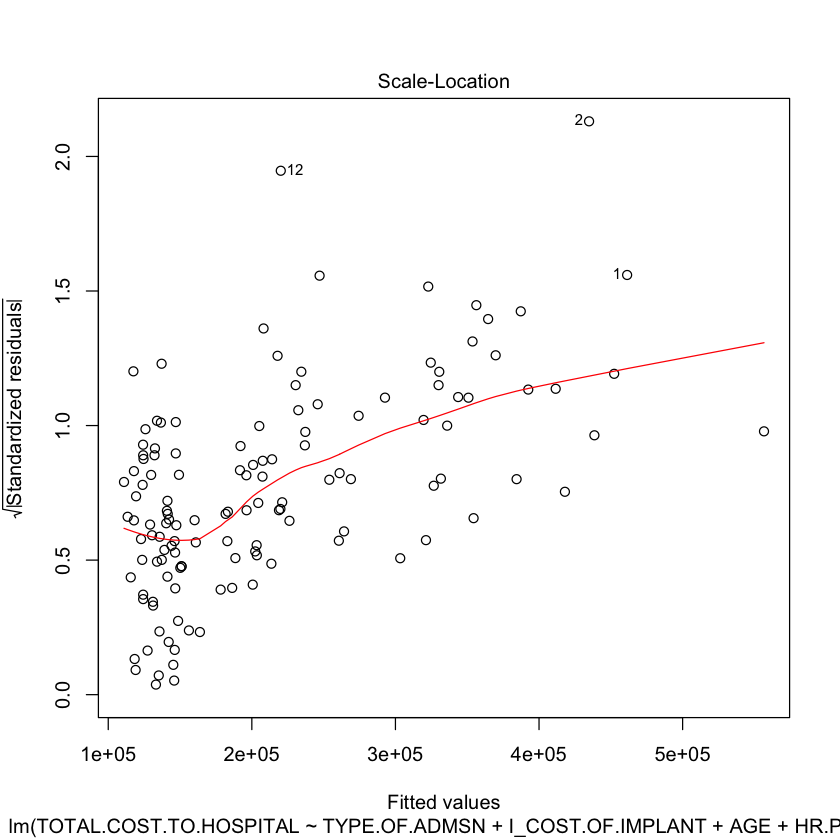

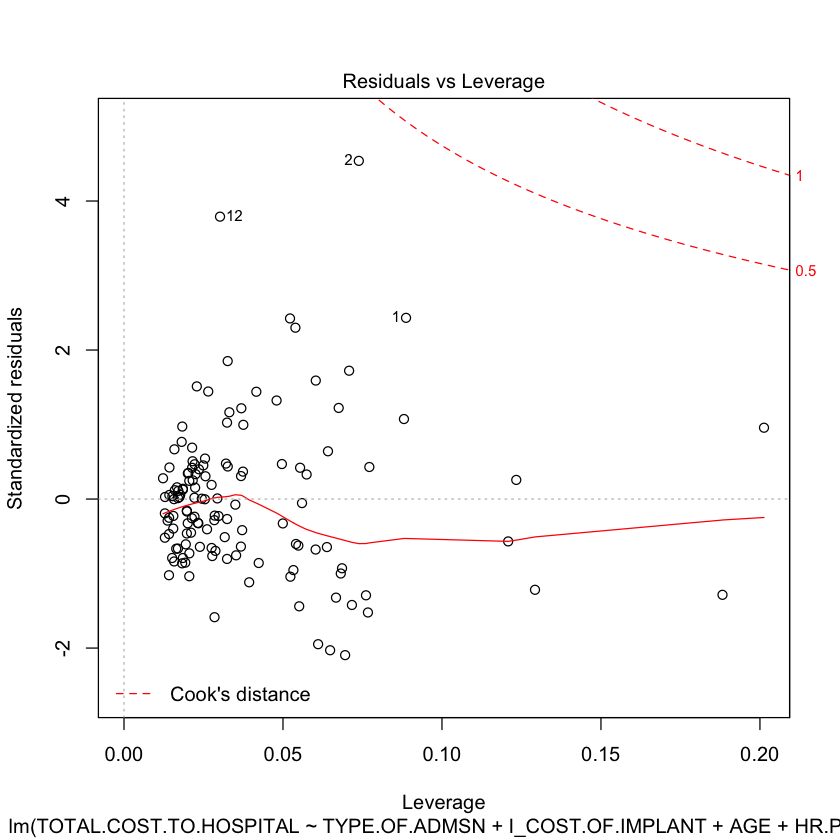

In [21]:
plot(reg_step_model)

#hist(residuals(RegModelStepwise), main = "Residuals", col = 'blue')


##### Visual inspection to check for heteroscedasticity in error terms

You may ignore the below code chuck. This is an elaboration of the scale-location plot obtained before.



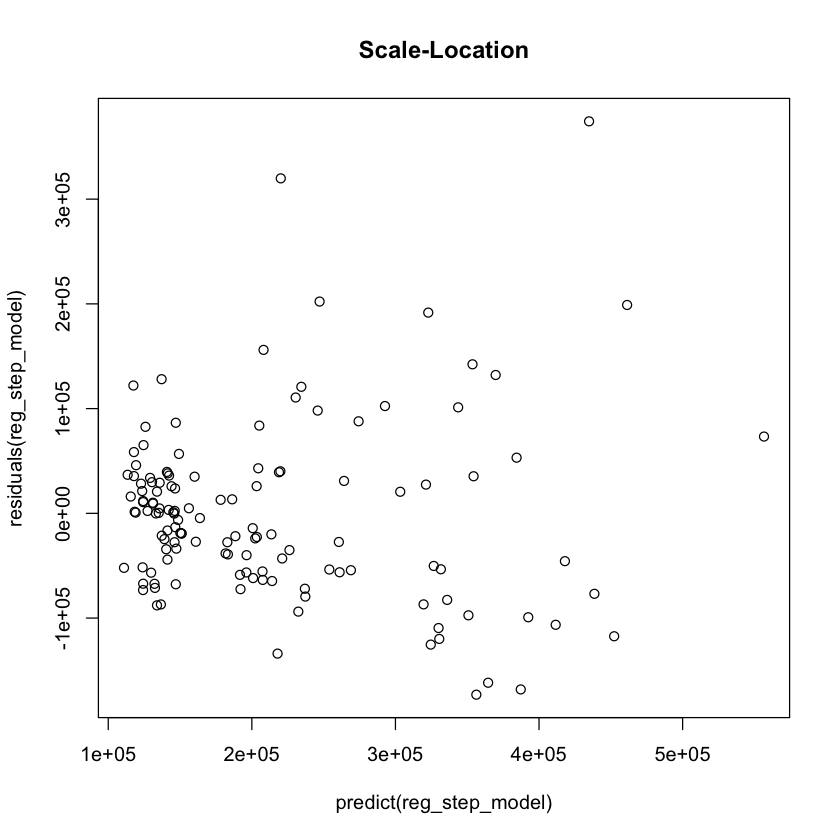

In [22]:
plot(predict(reg_step_model), residuals(reg_step_model), main = "Scale-Location")
#yhat <- RegModelStepwise$fitted.values
#plot(yhat, res) #same plot as above


##### Multi-colinearity

Variance Inflation Factor (VIF) is a measure of how much the variance of the estimated regrression coeffiecients are inflated as compared to when the predicator variable are not linearly related.

> VIF = 1 : Not Correlated
> 1<VIF<5 : Moderately Correlated
> 5<VIF<=10: Highly Correlated

_The square root of the VIF tells you how much larger the standard error is, compared with what it would be if that variable were uncorrelated with the other predictor variables in the model._

Say, if the square root of the VIF is 2.5; this means that the standard error for the coefficient of that predictor variable is 2.5 times as large as it would be if the predictor variable were uncorrelated with the other predictor variables

Generally the issue of multi-colinearity wil not arise, if the corelation amongst variable has been analyzed before model building and the one amongst the corelated variable has been dropped from the data.


In [23]:
vif(reg_step_model)

TYPE.OF.ADMSN I_COST.OF.IMPLANT               AGE          HR.PULSE 
         1.376674          1.041076          1.825443          1.371082


### 3. Model Validation on the Test Data

The **predict** function is used to get the predicted response on the new dataset.
You may get an error message if the test data has got any new levels which was not there in the training set. This generally happens when the data has categorical variable with multiple levels.


In [27]:
reg_test_df_predict = predict(reg_step_model, reg_test_df,
                            interval = "confidence",
                            level = 0.50,
                            type = "response")
data.frame(reg_test_df_predict, reg_test_df$TOTAL.COST.TO.HOSPITAL)

,fit,lwr,upr,reg_test_df.TOTAL.COST.TO.HOSPITAL
7,264104.8,247565.46,280644.0,887350.0
13,634002.6,585000.99,683004.3,711616.0
20,193467.0,185733.98,201200.1,214716.0
24,369427.5,355110.57,383744.5,345590.0
33,433188.5,417597.35,448779.7,418429.0
37,109551.7,99507.43,119596.0,293127.0
53,231500.1,219608.96,243391.2,138923.0
86,228070.5,215461.59,240679.4,275888.0
88,314826.3,298451.09,331201.6,294615.9
89,129623.4,120144.25,139102.5,156576.9




#### End of Document

***
***
